In [1]:
import numpy as np
num_points = 2000
vectors_set = []

In [2]:
for i in xrange(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        vectors_set.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

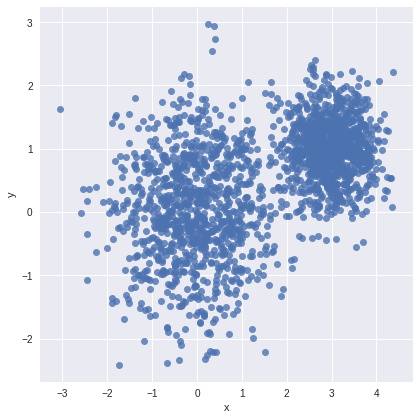

In [4]:
df = pd.DataFrame({"x": [v[0] for v in vectors_set], "y": [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [5]:
import tensorflow as tf
vectors = tf.constant(vectors_set)
k=100
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))
expanded_vectors = tf.expand_dims(vectors,0)
expanded_centroides = tf.expand_dims(centroides, 1)

In [6]:
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)

In [7]:
l = []
for c in xrange(k):
    eq = tf.equal(assignments, c)
    pos = tf.where(eq)
    res = tf.reshape(pos, [1,-1])
    gat = tf.gather(vectors, res)
    l.append(tf.reduce_mean(gat, reduction_indices=[1]))
# tf.concat에서 오류가 발생한 관계로, 원인 파악을 쉽게하기 위해 한줄의 TF 코드를 여러 줄로 나눠서 표기

In [8]:
means = tf.concat(l, 0)
# tf.concat의 오류 원인은 value와 axis의 위치 변화 때문으로...

In [9]:
update_centroides = tf.assign(centroides, means)
init_op = tf.global_variables_initializer()
#구 버전에서는 init_op = tf.initialize_all_variables() 였으나,
#신 버전에서는 tf.global_variables_initializer로 변경됨

sess = tf.Session()
sess.run(init_op)

for step in xrange(100):
    _, centroid_values, assignments_values = sess.run([update_centroides, centroides, assignments])

In [10]:
data = {"x": [], "y": [], "cluster": []}

In [11]:
for i in xrange(len(assignments_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignments_values[i])

In [12]:
# print (len(data["x"]), len(data["y"]), len(data["cluster"]), len(assignments_values))
#위의 global_variables_initializer를 사용하지 않으면 변수 초기화가 되지 않아 갯수가 불일치 한다고 나옴

In [13]:
df = pd.DataFrame(data)

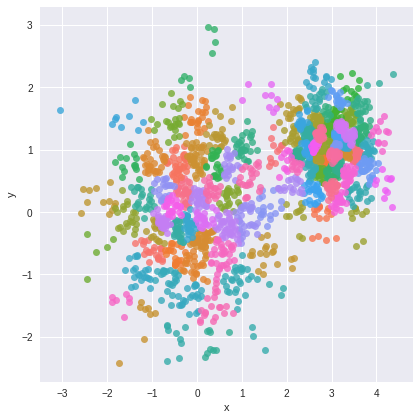

In [14]:
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()